In [3]:
import numpy as np
import matplotlib.pyplot as plt


## Gambling problem 
p is the observed probability of winning. $X$ is the state space which is all possible wealths from 0 to $w$. $w$  is the target wealth. $A$ is the action space which is all fractions < 1 so $A_i \in [0,1]$. $S_t$ is a random variable which indicates the outcome of the gamble. $S_t$ The bellman equation is formulated as follows:

$$X_{t+1} = (1+S_{t+1}*A_t)X_t$$



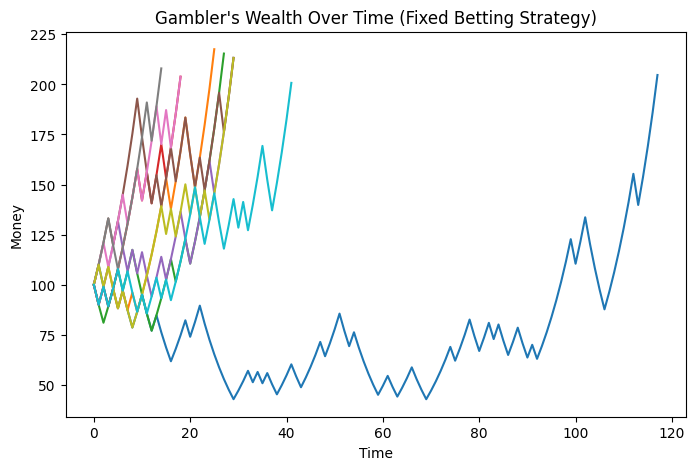

In [5]:
p = 0.6
X_0 = 100
w = 200
A = 0.1
num_sims = 10


def sim(p, X, w, A):
    history = [X]
    threshold = 1e-6
    while threshold <= X < w:
        S = np.random.choice([1, -1], p=[p, 1-p])  # Win or lose
        X = max(0, (1 + A * S) * X)
        history.append(X)

    return history

plt.figure(figsize=(8, 5))
for _ in range(num_sims):
    plt.plot(sim(p, X_0, w, A))

plt.xlabel("Time")
plt.ylabel("Money")
plt.title("Gambler's Wealth Over Time (Fixed Betting Strategy)")
plt.show()



## Value iteration and policy iteration


In [45]:
# parameters
def gambling(p, gamma, w, wealth_steps=1, action_steps=0.01, plot_value_function=False):
    A = [i * action_steps for i in range(1,int(1 / action_steps) + 1)]
    num_states = int(w / wealth_steps) + 1

    X = [i * wealth_steps for i in range(num_states)]
    V = [0 for _ in range(num_states)]
    V[-1] = 1
    convergence_threshold = 1e-6

    while True:
        V_new = V.copy()
        for i in range(1, num_states - 1):
            best_value = 0
            for a in A:
                bet = a * X[i]
                X_win = min(w, X[i] + bet)
                X_lose = max(0, X[i] - bet)

                i_win = int(X_win / wealth_steps)
                i_lose = int(X_lose / wealth_steps)

                expected_value = p * V[i_win] + (1 - p) * V[i_lose]
                best_value = max(best_value, expected_value)
            V_new[i] = best_value
        if max([abs(V_new[i] - V[i]) for i in range(num_states)]) < convergence_threshold:
            break
        V = V_new



    optimal_policy = [0 for _ in range(num_states)]
    for i in range(1, num_states - 1):
        best_a = 0
        best_value = 0
        for a in A:
            bet = a * X[i]
            X_win = min(w, X[i] + bet)
            X_lose = max(0, X[i] - bet)

            i_win = int(X_win / wealth_steps)
            i_lose = int(X_lose / wealth_steps)

            expected_value = p * V[i_win] + (1 - p) * V[i_lose]
            if expected_value > best_value:
                best_value = expected_value
                best_a = a

        optimal_policy[i] = best_a

    plt.bar(X, optimal_policy, width=wealth_steps*0.7)
    plt.xlabel("Money")
    plt.ylabel(f"Optimal Betting Fraction")
    plt.title("Optimal Betting Strategy for parameter p = {p}, gamma = {gamma}, w = {w}")
    plt.gcf().set_size_inches(30, 6)
    plt.show()

    if plot_value_function:
        plt.plot(X, V)
        plt.xlabel("Money")
        plt.ylabel("value")
        plt.title("state value function")
        plt.show()

# for i in range(num_states[-10:]):
#     print("X: ", X[i], "Optimal Policy: ", optimal_policy[i])



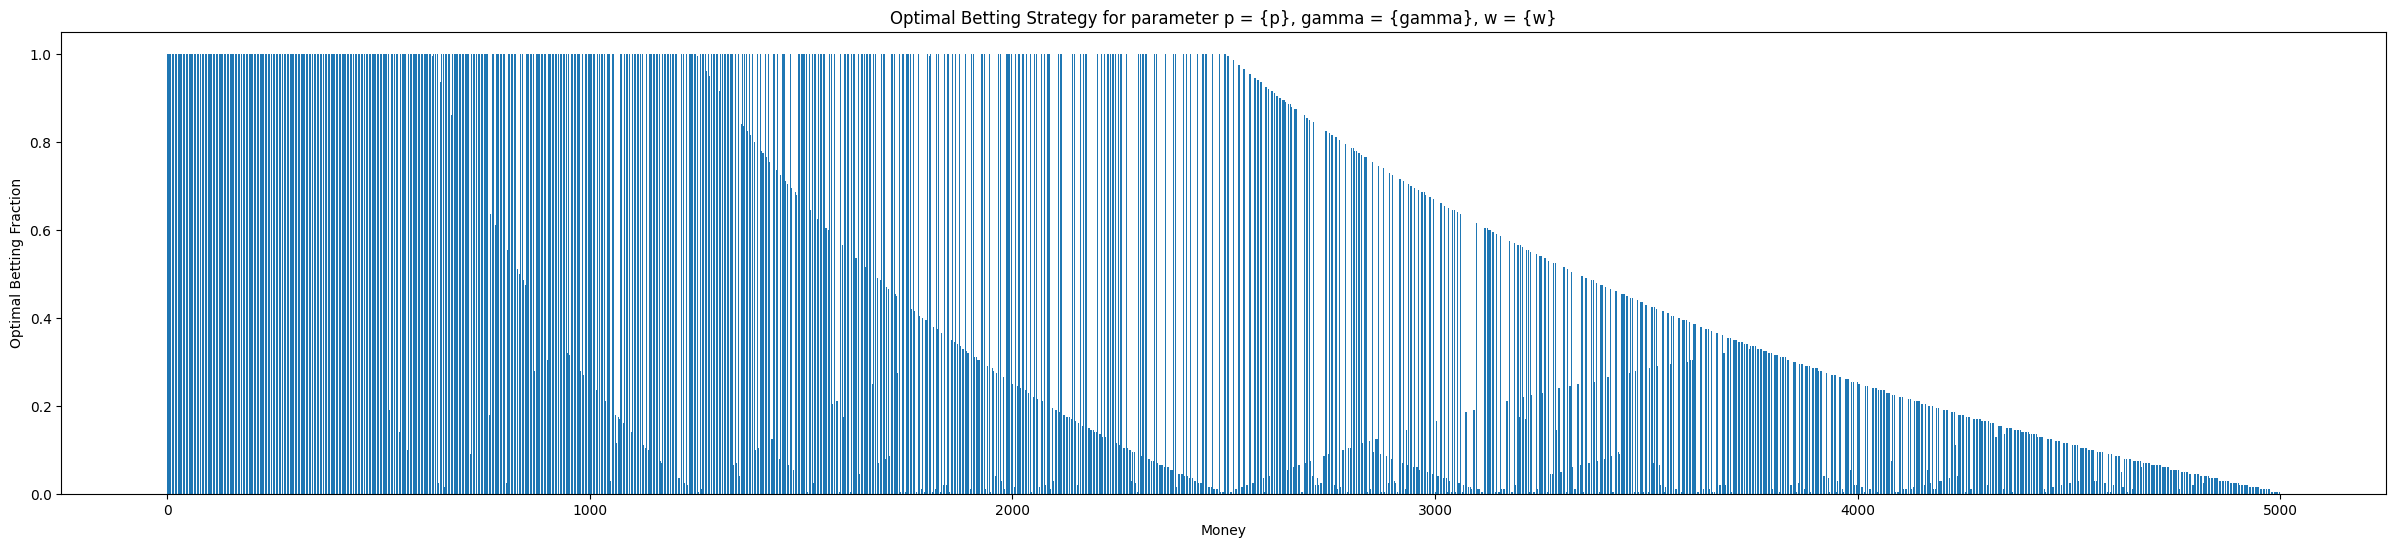

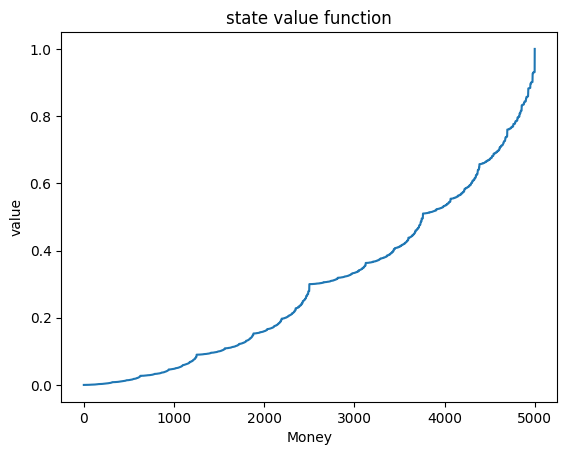

In [46]:
# p = 0.3
# gamma = 1
# w = 5000
# wealth_steps = 1
# action_steps = 0.01
gambling(0.3, 1, 5000, 1, 0.005, plot_value_function=True)

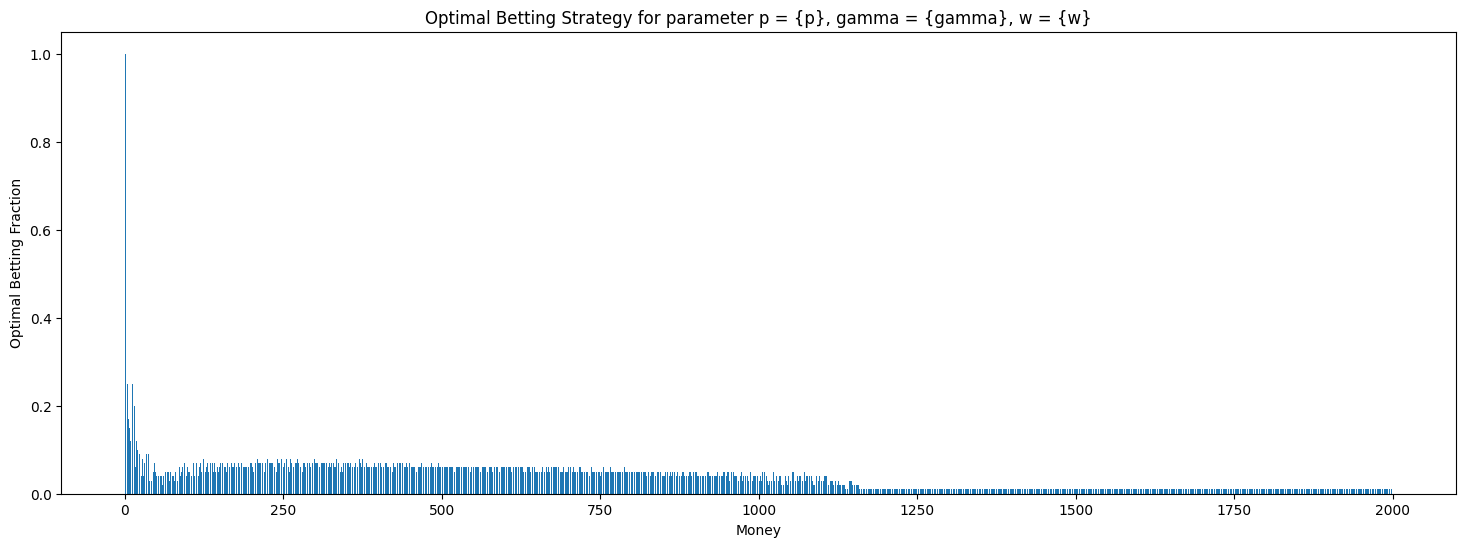

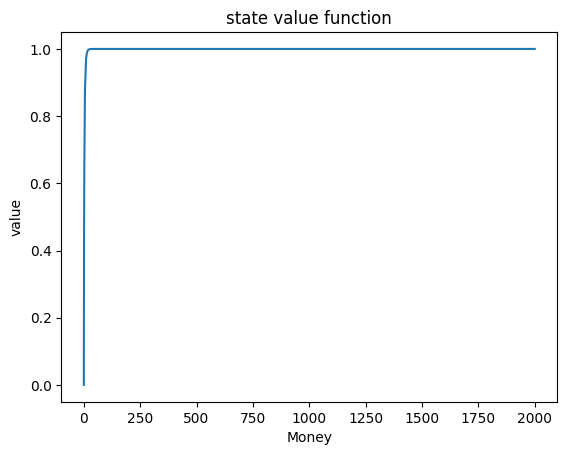

In [43]:
gambling(0.7, 1, 2000, 1, 0.01, plot_value_function=True)